In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def get_data(csv_file):
    with open(csv_file, 'r') as f:
        results = []
        next(f)
        for line in f:
            words = line.split(',')
            for i in range(len(words)):
                words[i] = float(words[i])
            results.append(words)
    Data = np.array(results)   
    Data = np.delete(Data, 0, axis = 1)
    return Data

In [111]:
raw_data=get_data('kmnist.csv')

In [ ]:

# Normalize data
mean = np.average(raw_data, axis=0)
mean = np.nan_to_num(mean, nan=0)
std = np.std(raw_data, axis=0)
std = np.nan_to_num(std, nan=1)
data = (raw_data - mean)/std
data = np.nan_to_num(data, nan=0)

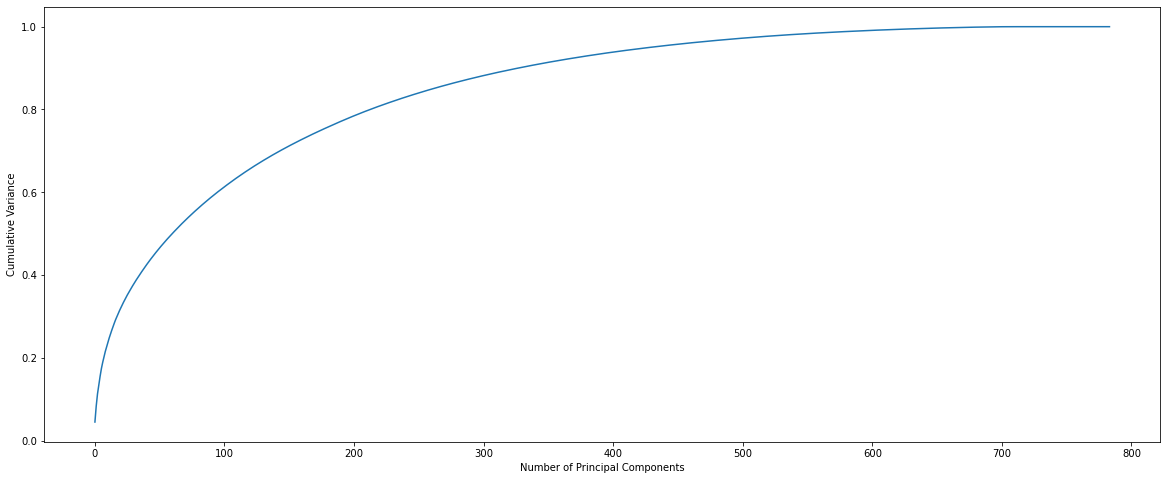

In [124]:
# Compute covariance matrix
cov_matrix = np.cov(data.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Compute variance explained by each principal component
variance = eigenvalues/ np.sum(eigenvalues)
cumulative_variance = np.cumsum(variance)

fig = plt.figure(figsize = (20, 8))
# Plot data variance as a function of the number of principal components
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.show()



In [128]:
print(cumulative_variance[100]*100)

61.34017506319355


In [131]:
for i in range(784):
    if(cumulative_variance[i]>=0.99):
        print(i)
        break

592
